In [1]:
library(ggplot2)

data("economics")

In [2]:
economics

date,pce,pop,psavert,uempmed,unemploy
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1967-07-01,506.7,198712,12.6,4.5,2944
1967-08-01,509.8,198911,12.6,4.7,2945
1967-09-01,515.6,199113,11.9,4.6,2958
1967-10-01,512.2,199311,12.9,4.9,3143
1967-11-01,517.4,199498,12.8,4.7,3066
1967-12-01,525.1,199657,11.8,4.8,3018
1968-01-01,530.9,199808,11.7,5.1,2878
1968-02-01,533.6,199920,12.3,4.5,3001
1968-03-01,544.3,200056,11.7,4.1,2877


In [3]:
avg_unemployment_rate <- mean(economics$unemploy)
avg_unemployment_rate

[1] 7771.31

In [4]:
library(lubridate)
library(dplyr)
quarterly_changes <- economics %>%
 mutate(year_quarter = paste(year(date), "Q", quarter(date), sep="")) %>%
 group_by(year_quarter) %>%
 summarise(quarterly_change = (max(pce) - min(pce)) / min(pce) * 100)
max_change <- quarterly_changes[which.max(quarterly_changes$quarterly_change), ]
min_change <- quarterly_changes[which.min(quarterly_changes$quarterly_change), ]
min_change
max_change


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




year_quarter,quarterly_change
<chr>,<dbl>
2015Q2,0


year_quarter,quarterly_change
<chr>,<dbl>
1978Q1,3.61038


In [5]:
avg_inflation_rate <- mean(economics$psavert)
avg_inflation_rate

[1] 8.567247

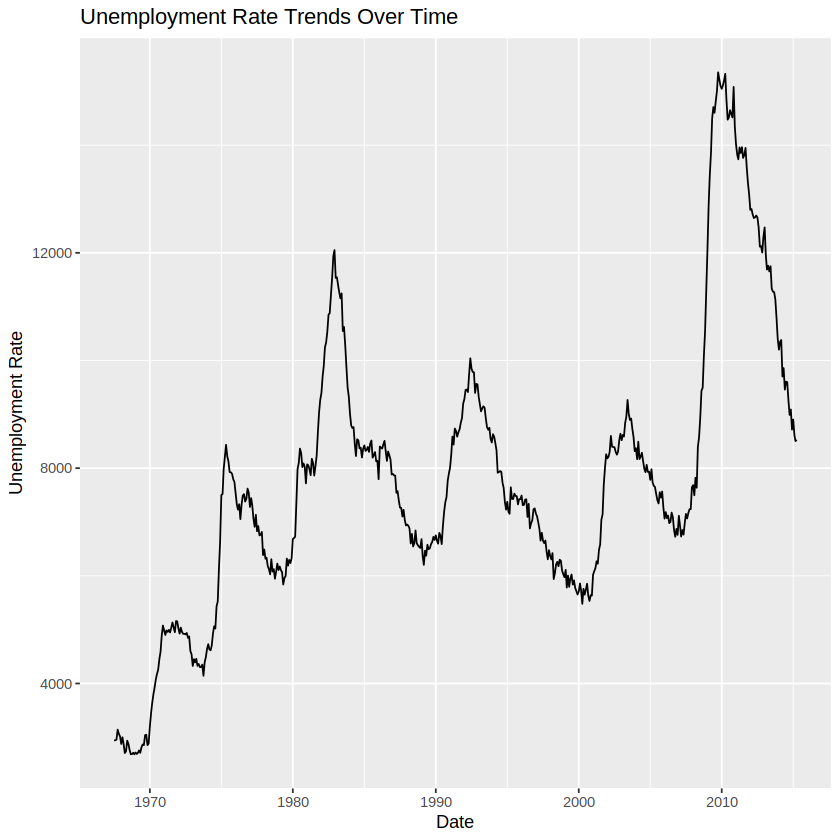

In [6]:
unemployment_trends_plot <- ggplot(data=economics, aes(x=date, y=unemploy)) +
 geom_line() +
 labs(x="Date", y="Unemployment Rate") +
 ggtitle("Unemployment Rate Trends Over Time")
unemployment_trends_plot

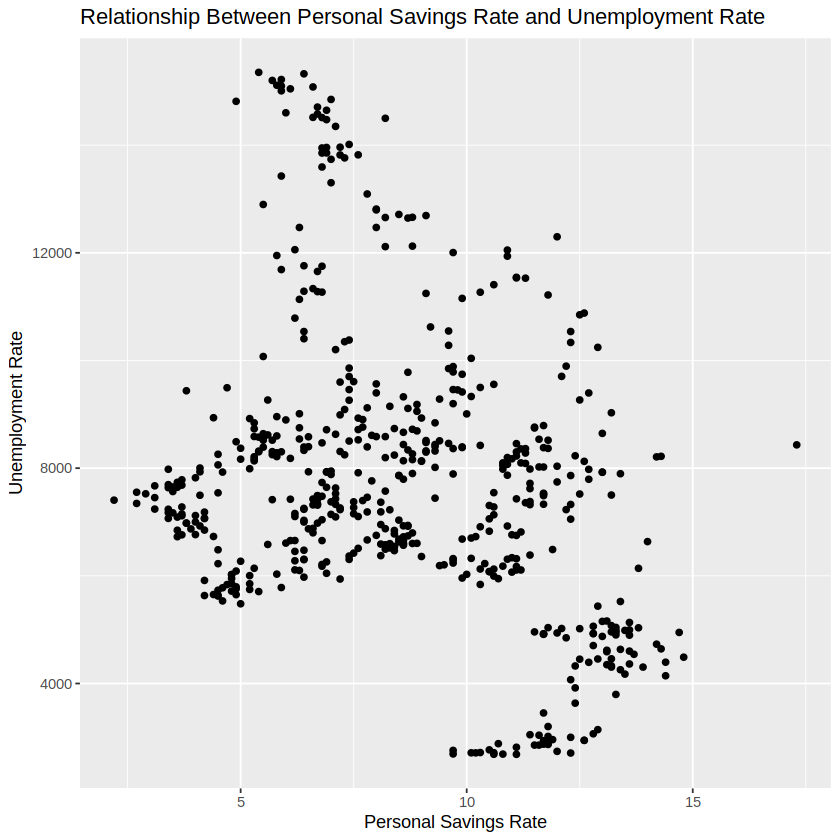

In [7]:
inflation_unemployment_plot <- ggplot(data=economics, aes(x=psavert, y=unemploy)) +
 geom_point() +
 labs(x="Personal Savings Rate", y="Unemployment Rate") +
 ggtitle("Relationship Between Personal Savings Rate and Unemployment Rate")
inflation_unemployment_plot

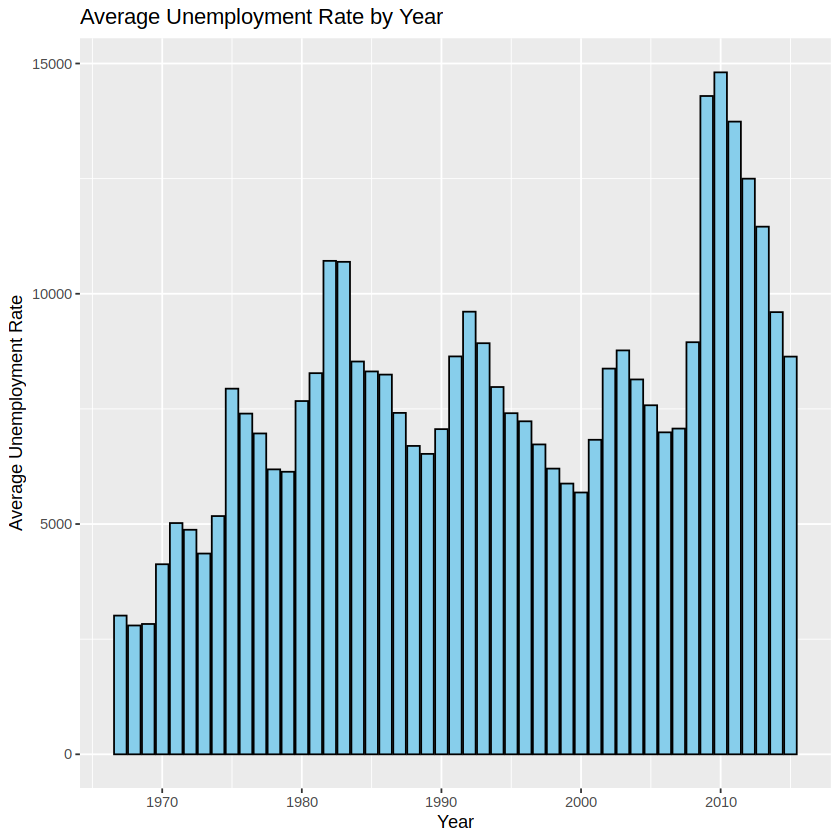

In [9]:
library(ggplot2)
library(lubridate)

unemployment_by_year_plot <- ggplot(data = economics, aes(x = year(date), y = unemploy)) +
  geom_bar(stat = "summary", fun = mean, fill = "skyblue", color = "black") +
  labs(x = "Year", y = "Average Unemployment Rate") +
  ggtitle("Average Unemployment Rate by Year")

unemployment_by_year_plot


No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


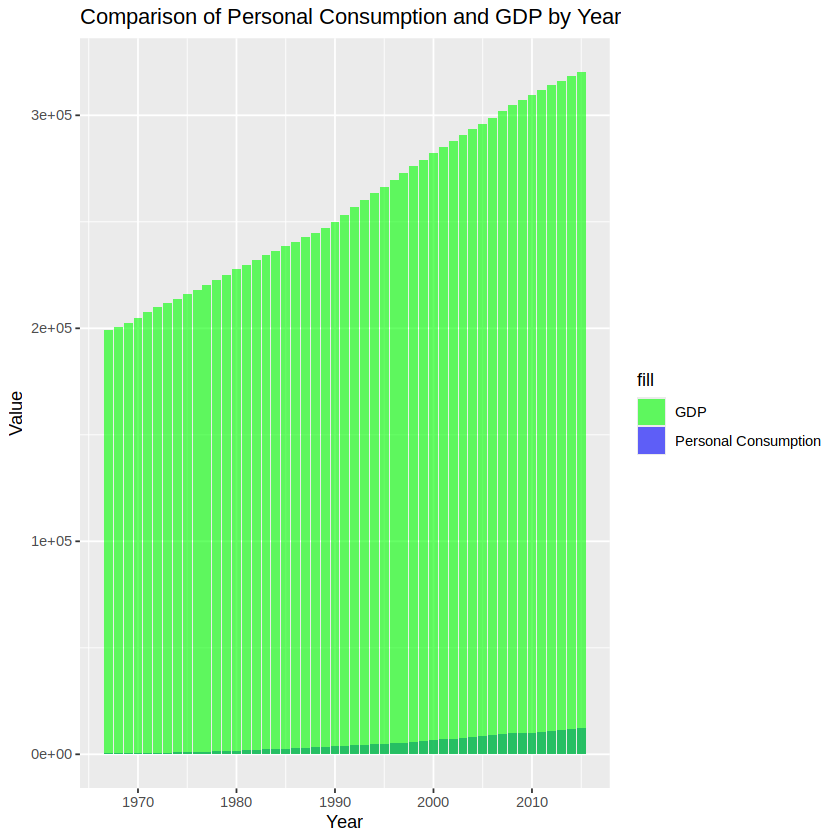

In [11]:
library(ggplot2)
library(lubridate)

gdp_personal_consumption_comparison_plot <- ggplot(data = economics, aes(x = year(date))) +
  geom_bar(stat = "summary", aes(y = pce, fill = "Personal Consumption"), alpha = 0.6, position = "dodge") +
  geom_bar(stat = "summary", aes(y = pop, fill = "GDP"), alpha = 0.6, position = "dodge") +
  labs(x = "Year", y = "Value") +
  scale_fill_manual(values = c("Personal Consumption" = "blue", "GDP" = "green")) +
  ggtitle("Comparison of Personal Consumption and GDP by Year")

gdp_personal_consumption_comparison_plot


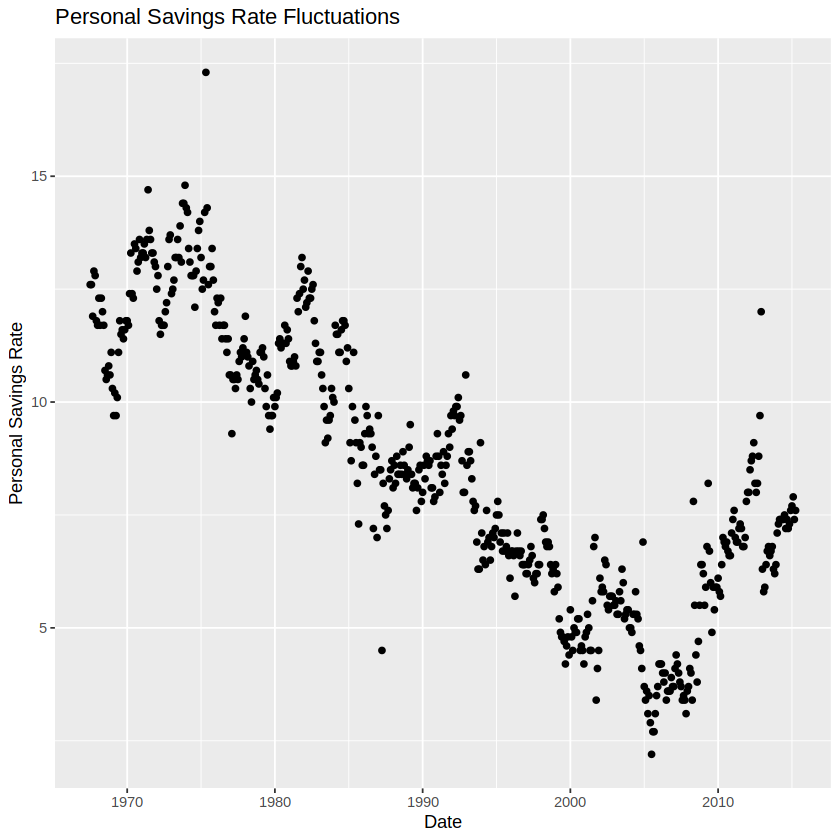

In [12]:
inflation_fluctuations_plot <- ggplot(data=economics, aes(x=date, y=psavert)) +
 geom_point() +
 labs(x="Date", y="Personal Savings Rate") +
 ggtitle("Personal Savings Rate Fluctuations")
inflation_fluctuations_plot

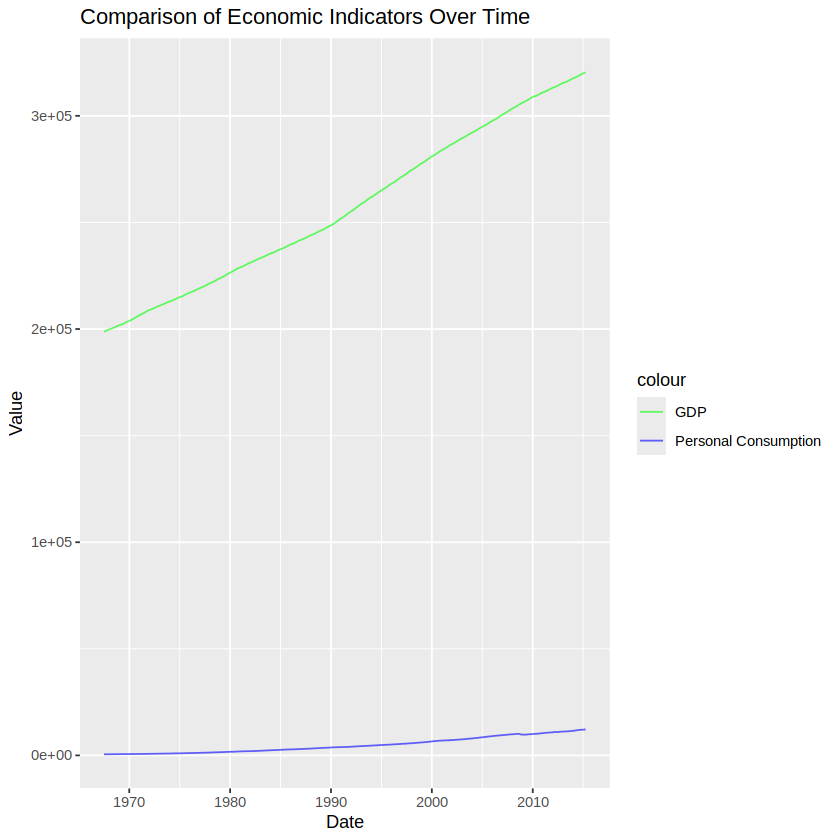

In [13]:
economic_indicators_comparison_plot <- ggplot(data=economics, aes(x=date)) +
 geom_line(aes(y=pce, color="Personal Consumption"), alpha=0.6) +
 geom_line(aes(y=pop, color="GDP"), alpha=0.6) +
 labs(x="Date", y="Value") +
 scale_color_manual(values=c("Personal Consumption"="blue", "GDP"="green")) +
 ggtitle("Comparison of Economic Indicators Over Time")
economic_indicators_comparison_plot